# HW 2 - Discrimination by Regression
## Murat Han Aydoğan
### 64756

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

## Importing Data

In [2]:
# read data into memory
data_set = np.genfromtxt("hw02_data_points.csv", delimiter=",")
data_set_y = np.genfromtxt("hw02_class_labels.csv")

# get X
X = data_set[:10000].astype(float)
X_test = data_set[10000:].astype(float)

# get number of samples
N = X.shape[0]
N_test = X_test.shape[0]
# get number of features
D = X.shape[1]

In [3]:
print(N, N_test, D)

10000 5000 784


In [4]:
#get y values
y_truth = np.transpose(np.array([data_set_y[:10000].astype(int)]))
y_test = np.transpose(np.array([data_set_y[10000:].astype(int)]))

# get number of classes
K = np.max(y_truth)
print(K)

# one-of-K encoding
Y_truth = np.zeros((N, K)).astype(int)
Y_truth[range(N), y_truth[:, 0] - 1] = 1

Y_test = np.zeros((N_test, K)).astype(int)
Y_test[range(N_test), y_test[:, 0] - 1] = 1

print(Y_truth)
print(Y_test)

10
[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


## Sigmoid Function

$\textrm{sigmoid}(\boldsymbol{w}^{\top} \boldsymbol{x} + w_{0}) = \dfrac{1}{1 + \exp\left[-(\boldsymbol{w}^{\top} \boldsymbol{x} + w_{0})\right]}$

In [5]:
# define the sigmoid function
def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))

In [6]:
# define the softmax function
def softmax(X, W, w0):
    N = X.shape[0]
    K = W.shape[1]
    scores = np.matmul(np.hstack((X, np.ones((N, 1)))), np.vstack((W, w0)))
    scores = np.exp(scores - np.repeat(np.amax(scores, axis = 1, keepdims = True), K, axis = 1))
    scores = scores / np.repeat(np.sum(scores, axis = 1, keepdims = True), K, axis = 1)
    return(scores)

## Gradient Functions

\begin{align*}
\dfrac{\partial \textrm{Error}}{\partial \boldsymbol{w}_{c}} &= -\sum\limits_{i = 1}^{N} (y_{ic} - \widehat{y}_{ic})(\widehat{y}_{ic})(1 - \widehat{y}_{ic})\boldsymbol{x}_{i} \\
\dfrac{\partial \textrm{Error}}{\partial w_{c0}} &= -\sum\limits_{i = 1}^{N} (y_{ic} - \widehat{y}_{ic})(\widehat{y}_{ic})(1- \widehat{y}_{ic}) 
\end{align*}

In [7]:
# define the gradient functions
def gradient_W(X, Y_truth, Y_predicted):
    y = ((Y_truth - Y_predicted) * Y_predicted * (1 - Y_predicted))
    return(np.asarray([-np.matmul(y[:, c], X) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    y = ((Y_truth - Y_predicted) * Y_predicted * (1 - Y_predicted))
    return(-np.sum(y, axis = 0))

## Algorithm Parameters

In [8]:
# set learning parameters
eta = 0.00001
iteration_count = 1000

In [9]:
W_data_set = np.genfromtxt("hw02_W_initial.csv", delimiter=",")
w0_data_set = np.genfromtxt("hw02_w0_initial.csv", delimiter=",")

W = W_data_set.astype(float)

w0 = w0_data_set.astype(float)

## Iterative Algorithm

$\textrm{Error} = 0.5 \sum\limits_{i = 1}^{N} \sum\limits_{c = 1}^{K} \left[ y_{ic}- \hat{y}_{ic} \right]^2$

In [10]:
# learn W and w0 using gradient descent
iteration = 1
objective_values = []
while True:
    Y_predicted = sigmoid(X, W, w0)

    objective_values = np.append(objective_values, 0.5 * np.sum((Y_truth - Y_predicted)**2))

    W_old = W
    w0_old = w0

    W = W_old - eta * gradient_W(X, Y_truth, Y_predicted)
    w0 = w0_old - eta * gradient_w0(Y_truth, Y_predicted)

    if iteration == iteration_count:
        break

    iteration = iteration + 1
print(W)
print(w0)

[[-0.01324798 -0.02823844 -0.00326868 ... -0.04877851  0.01212054
  -0.01143465]
 [-0.01183842 -0.03963016 -0.01295336 ... -0.04034705  0.00400381
  -0.02111644]
 [-0.01998825 -0.03633561 -0.00489235 ... -0.04108662  0.01387463
  -0.02484677]
 ...
 [-0.01341638 -0.0199712  -0.02071762 ... -0.03364511  0.00594223
  -0.01845717]
 [-0.00980747 -0.03218592 -0.02022552 ... -0.03211477  0.01611503
  -0.00845905]
 [-0.01977218 -0.02373074 -0.01468591 ... -0.04159601  0.01068509
  -0.02400039]]
[-0.01287857 -0.02891159 -0.00873806 -0.03535891 -0.02597275 -0.06542254
 -0.01501564 -0.0451543   0.00689065 -0.01964791]


In [11]:
print(Y_predicted.shape)
print(Y_truth.shape)

(10000, 10)
(10000, 10)


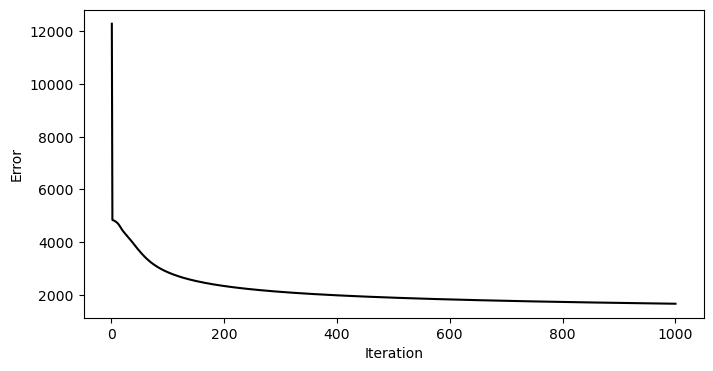

In [12]:
# plot objective function during iterations
plt.figure(figsize = (8, 4))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

## Training Performance

In [13]:
# calculate confusion matrix
y_predicted = np.array([np.argmax(Y_predicted, axis = 1) + 1])
confusion_matrix = pd.crosstab(y_predicted[0], y_truth.T[0],
                               rownames = ["y_pred"],
                               colnames = ["y_truth"])

print(confusion_matrix)

y_truth   1    2    3    4    5    6    7    8    9    10
y_pred                                                   
1        838    3   14   44    5    0  220    0    1    0
2          4  908    1   17    4    0    3    0    2    0
3         14   12  645   14   69    0  133    0    9    1
4         89   37    5  870   41    2   55    0   12    2
5          2    6  172   28  763    0  123    0    6    0
6         16    3   26    5    8  841   30   89   25   33
7         27    3   80   28   79    0  423    0   17    0
8          0    0    0    0    0  115    1  862    8   43
9         18    0    8    5   10   13   34    2  892    0
10         1    0    0    1    0   37    0   84    2  957


# Testing Data

In [ ]:
# learn W and w0 using gradient descent
iteration = 1
objective_values_test = []
while True:
    Y_predicted_test = softmax(X_test, W, w0)

    objective_values_test = np.append(objective_values_test, 0.5 * np.sum((Y_test - Y_predicted_test)**2))

    W_old = W
    w0_old = w0

    W = W_old - eta * gradient_W(X_test, Y_test, Y_predicted_test)
    w0 = w0_old - eta * gradient_w0(Y_test, Y_predicted_test)

    if iteration == iteration_count:
        break

    iteration = iteration + 1
print(W)
print(w0)

In [ ]:
# plot objective function during iterations
plt.figure(figsize = (8, 4))
plt.plot(range(1, iteration + 1), objective_values_test, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

In [ ]:
# calculate confusion matrix
y_predicted_test = np.array([np.argmax(Y_predicted_test, axis = 1) + 1])
confusion_matrix_test = pd.crosstab(y_predicted_test[0], y_test.T[0],
                               rownames = ["y_pred"],
                               colnames = ["y_truth"])

print(confusion_matrix_test)